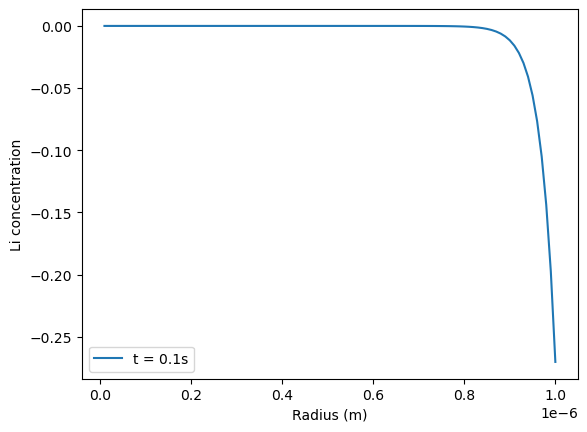

In [ ]:
from fipy import CellVariable, Grid1D, DiffusionTerm, TransientTerm, Viewer
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# Parameters
# -----------------------------
R = 1e-6           # Particle radius (m)
nx = 100           # Number of grid points
D = 1e-14          # Diffusion coefficient (m^2/s)
j_flux = 1e-7      # Surface flux (mol/m^2/s)
total_time = 100   # Total simulation time (s)
dt = 0.1           # Time step (s)

dx = R / nx
mesh = Grid1D(nx=nx, dx=dx)
r = mesh.cellCenters[0] + dx/2  # Avoid r = 0 singularity

c = CellVariable(name="Li concentration", mesh=mesh, value=0.0)

# -----------------------------
# PDE: ∂c/∂t = D∇²c + (2D/r)∂c/∂r
eq = TransientTerm() == DiffusionTerm(coeff=D) + (2 * D / r) * c.grad[0]

c.faceGrad.constrain(0.0, mesh.facesLeft)
# Surface flux (Neumann BC)
c.faceGrad.constrain(-j_flux / D, mesh.facesRight)


time = 0.0
t_list, soc_list = [], []

plt.ion()
fig, ax = plt.subplots()

while time < total_time:
    eq.solve(var=c, dt=dt)
    time += dt

    soc = np.mean(c.value)
    t_list.append(time)
    soc_list.append(soc)

    ax.clear()
    ax.plot(r, c.value, label=f't = {time:.1f}s')
    ax.set_xlabel("Radius (m)")
    ax.set_ylabel("Li concentration")
    ax.legend()
    plt.pause(0.05)

plt.ioff()
plt.show()

plt.figure()
plt.plot(t_list, soc_list)
plt.xlabel("Time (s)")
plt.ylabel("Average Concentration (SoC)")
plt.title("State of Charge vs Time")
plt.grid(True)
plt.show()



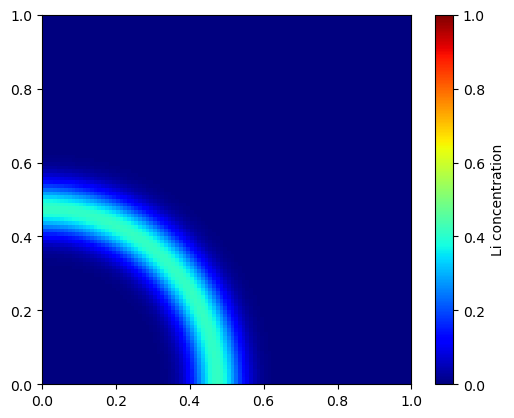

KeyboardInterrupt: 

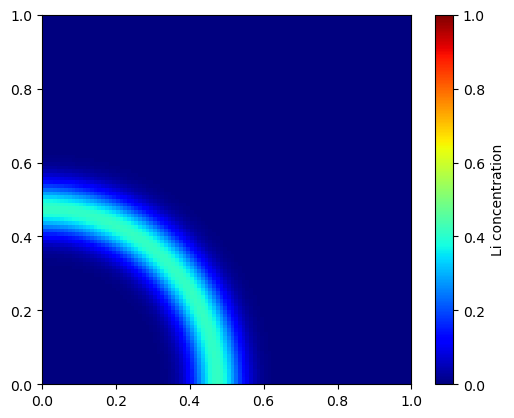

In [ ]:
from fipy import CellVariable, DiffusionTerm, TransientTerm, Grid2D, Viewer
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------
# Parameters
L = 1.0           # domain size (square box, m)
N = 100           # grid points per dimension
D = 1e-3          # diffusion coefficient
dt = 0.001        # time step
total_time = 2.0  # total simulation time
nsteps = int(total_time / dt)
R = 0.5           # radius of circular electrode region

# Create a 2D square mesh and mask a circle
dx = L / N
mesh = Grid2D(dx=dx, dy=dx, nx=N, ny=N)

# Define the circular mask (centered)
x, y = mesh.cellCenters
mask = (x**2 + y**2) < R**2

#variable
phi = CellVariable(name="Li concentration", mesh=mesh, value=0.0)

# Initially: concentration = 1 at boundary, 0 inside
phi.setValue(1.0, where=(mask & ((x**2 + y**2) > (R-0.05)**2)))

# ------------------------------------
# PDE
eq = TransientTerm() == DiffusionTerm(coeff=D)

# Visualization setup
viewer = Viewer(vars=phi, datamin=0., datamax=1.)


# Time loop

for step in range(nsteps):
    eq.solve(var=phi, dt=dt)
    if step % 20 == 0:
        viewer.plot()

plt.title("2D Circular Lithium Diffusion Simulation")
plt.show()
